In [5]:
%pip install ultralytics --quiet

Note: you may need to restart the kernel to use updated packages.


In [31]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [34]:
import torch

# Define the path to the model file
model_path = 'best.pt'

# Function to load the model
def load_model(model_path):
    try:
        # Load the model
        model = torch.load(model_path, map_location=torch.device('cpu'))  # Load to CPU
        model.eval()  # Set the model to evaluation mode
        print("Model loaded successfully.")
        return model
    except FileNotFoundError:
        print("Model file not found. Please check the file path and try again.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Call the function to load the model
model = load_model(model_path)

# If you need to check if the model loads correctly
if model:
    print("Model is ready for inference.")
else:
    print("Failed to load model.")


An error occurred: 'dict' object has no attribute 'eval'
Failed to load model.


In [ ]:
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Adjust size to match the model's training setup
    transforms.ToTensor()
])


In [ ]:
# Replace 'path_to_image.jpg' with your image path or URL
image_path = 'path_to_image.jpg'
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image)
input_tensor = input_tensor.unsqueeze(0)  # Add batch dimension if necessary


In [ ]:
with torch.no_grad():
    predictions = model(input_tensor)  # Adjust this if your model expects different inputs

# Example output format: [xmin, ymin, xmax, ymax, confidence], adjust based on your model's output


In [ ]:
fig, ax = plt.subplots(1)
ax.imshow(image)
for xmin, ymin, xmax, ymax, conf in predictions[0]:
    if conf > 0.5:  # Display only boxes with confidence > 0.5, adjust threshold as needed
        rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
plt.show()


IndexError: invalid index to scalar variable.

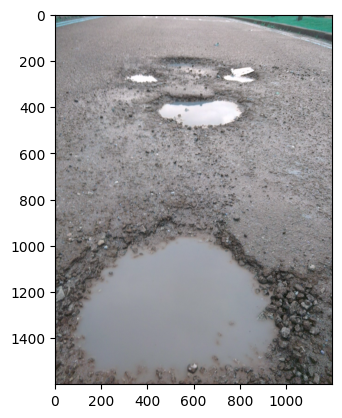

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to plot bounding boxes
def plot_results(image, boxes, names):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for box in boxes:
        x1, y1, x2, y2 = box[:4]  # Extract coordinates
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        label = names[int(box[5])]  # Assuming the 6th element is the class index
        plt.text(x1, y1, label, color='white', verticalalignment='top',
                 bbox={'color': 'red', 'pad': 0})
    plt.show()

# Assuming 'results' is obtained correctly from the YOLO model
for result in results:
    image = result.orig_img  # The original image as a numpy array
    boxes = result.boxes.xyxy[0].numpy()  # Assuming 'boxes' are tensor and need conversion
    plot_results(image, boxes, result.names)

# Saving the Results (if necessary, you could integrate this into the loop)
result.save(filename='result.jpg')  # ensure this is outside the loop or correctly indexed
